# **MaternAI: Predicting Pregnancy Risks with Machine Learning**

## **Project Statement**
This project aims to develop a predictive model to assess pregnancy risk based on various factors such as age, blood pressure, blood sugar levels, and other relevant parameters.

---

## **Project Outcomes**
- Develop a predictive model to classify pregnancy risk levels.
- Achieve high accuracy, precision, recall, and F1-score in model evaluation.
- Identify key factors influencing pregnancy risk.
- Provide actionable insights for healthcare providers.

Week 1: Data Collection and Preprocessing

In [43]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
#loading the dataset
df=pd.read_csv('/content/pregnancy risk prediction data set.csv',encoding='latin1')

In [45]:
df.shape

(6103, 11)

In [46]:
df.head()

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,1994601,Moulya,20,97.5,91,161,100,24.9,41,5.8,high risk
1,2001562,Soni,45,97.7,99,99,94,22.1,36,5.7,high risk
2,2002530,Baishali,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,2002114,Abhilasha,26,99.5,135,161,101,23.7,46,4.5,high risk
4,2002058,Aanaya,38,102.5,51,106,91,18.8,38,4.3,high risk


In [47]:
df.tail()

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
6098,2002617,Pragalya,24,96.0,101,142,97,20.3,39,6.7,mid risk
6099,2003332,Jyoshita,38,96.0,59,129,94,20.0,39,7.0,high risk
6100,2012649,Mrimnayi,40,103.3,145,123,95,24.6,36,5.0,high risk
6101,2010533,Vardhani,21,99.0,130,152,99,23.2,47,6.6,high risk
6102,2002215,Nivashni,29,98.6,84,136,80,24.9,38,4.5,low risk


In [48]:
#checking columns
print(df.columns)

Index(['Patient ID', 'Name', 'Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'],
      dtype='object')


In [49]:
#deleting unnecessary columns
df=df.drop(columns=['Patient ID','Name'])

In [50]:
#checking missing values
missing_values=df.isnull().sum()
print(missing_values)

Age                                  0
Body Temperature(F)                  0
Heart rate(bpm)                      0
Systolic Blood Pressure(mm Hg)       0
Diastolic Blood Pressure(mm Hg)      0
BMI(kg/m 2)                          0
Blood Glucose(HbA1c)                 0
Blood Glucose(Fasting hour-mg/dl)    0
Outcome                              0
dtype: int64


In [55]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

duplicate_row=df.duplicated()
print(df[duplicate_row])

Number of duplicate rows: 1
      Age  Body Temperature(F)   Heart rate(bpm)  \
3537   24                  98.6               75   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
3537                             126                               90   

      BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
3537         19.0                    37                                5.9   

       Outcome  
3537  low risk  


In [56]:
# Removing duplicates
df=df.drop_duplicates()

In [57]:
# After removing again Checking for duplicates to make sure there are no duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6102 entries, 0 to 6102
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6102 non-null   int64  
 1   Body Temperature(F)                6102 non-null   float64
 2   Heart rate(bpm)                    6102 non-null   int64  
 3   Systolic Blood Pressure(mm Hg)     6102 non-null   int64  
 4   Diastolic Blood Pressure(mm Hg)    6102 non-null   int64  
 5   BMI(kg/m 2)                        6102 non-null   float64
 6   Blood Glucose(HbA1c)               6102 non-null   int64  
 7   Blood Glucose(Fasting hour-mg/dl)  6102 non-null   float64
 8   Outcome                            6102 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 476.7+ KB


In [59]:
df.describe()

,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl)
count,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000
mean,26.425434,98.665585,86.102589,129.218781,87.257129,21.435980,37.904621,5.504687
std,6.390653,1.591113,22.628995,17.235580,7.793659,2.157012,4.400617,0.905387
min,15.000000,39.600000,45.000000,90.000000,9.000000,14.900000,30.000000,3.500000
25%,22.000000,98.600000,72.000000,120.000000,82.000000,19.600000,34.000000,4.800000
50%,25.000000,98.600000,80.000000,128.000000,86.500000,21.300000,38.000000,5.700000
75%,30.000000,98.800000,91.000000,141.000000,92.000000,23.100000,41.000000,6.000000
max,250.000000,104.000000,150.000000,169.000000,142.000000,27.900000,50.000000,8.900000


Week 2: Exploratory Data Analysis (EDA)

In [60]:

# Converting relevant columns to numeric types
numerical_columns = [
    'Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
    'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
    'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)'
]

# Printing the DataFrame columns to verify column names
print(df.columns)

for col in numerical_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"Warning: Column '{col}' not found in the DataFrame.")

# Converting categorical columns to category type
df['Outcome'] = df['Outcome'].astype('category')

# Displaying info after type conversion
print("Dataset Info After Type Conversion:")
print(df.info())

Index(['Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)', 'Outcome'],
      dtype='object')
Dataset Info After Type Conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 6102 entries, 0 to 6102
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                6102 non-null   int64   
 1   Body Temperature(F)                6102 non-null   float64 
 2   Heart rate(bpm)                    6102 non-null   int64   
 3   Systolic Blood Pressure(mm Hg)     6102 non-null   int64   
 4   Diastolic Blood Pressure(mm Hg)    6102 non-null   int64   
 5   BMI(kg/m 2)                        6102 non-null   float64 
 6   Blood Glucose(HbA1c)               6102 non-null   int64   
 7   Blood Glucose(Fa

<ipython-input-60-5d1287ac247e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
<ipython-input-60-5d1287ac247e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outcome'] = df['Outcome'].astype('category')


Univariate Analysis

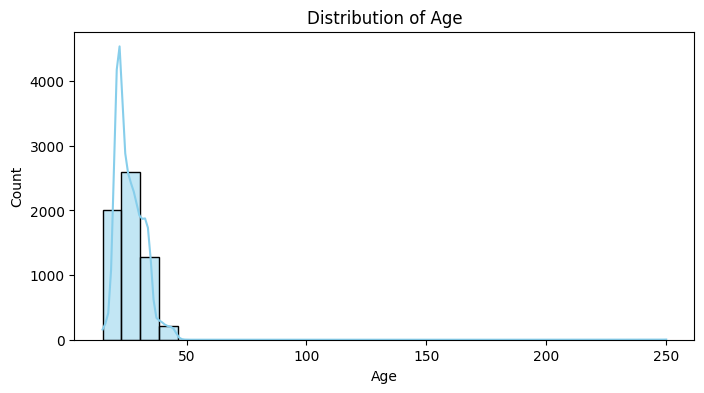

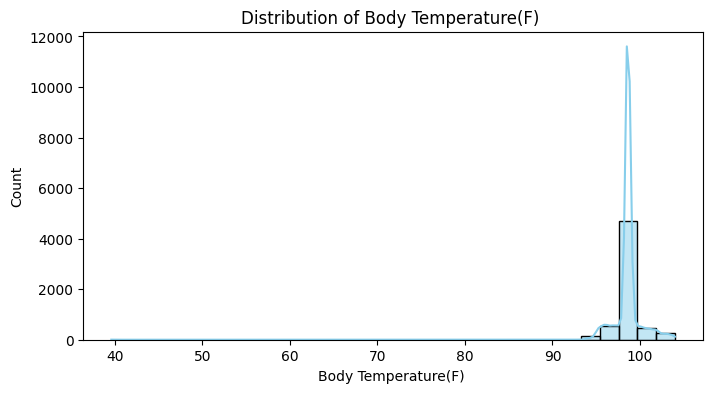

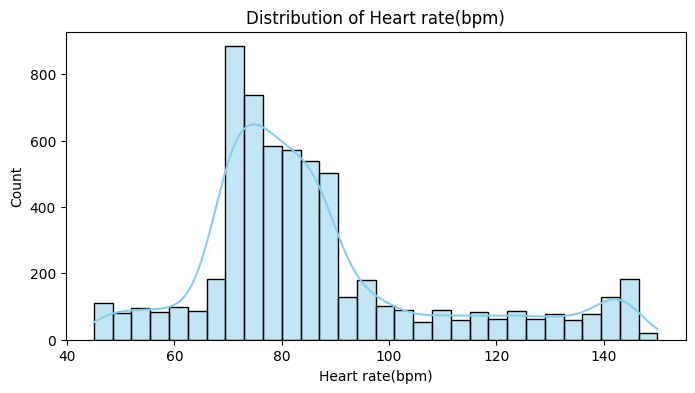

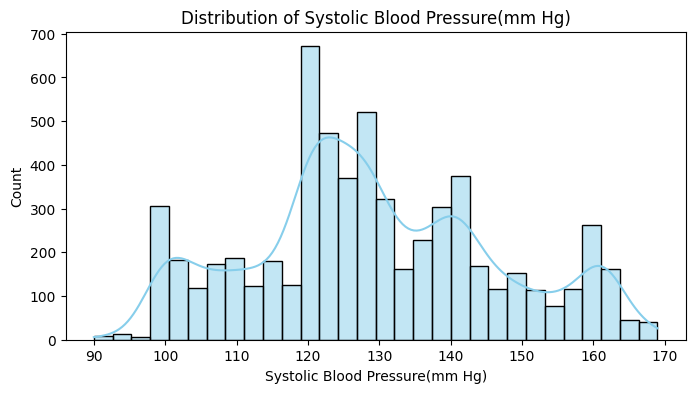

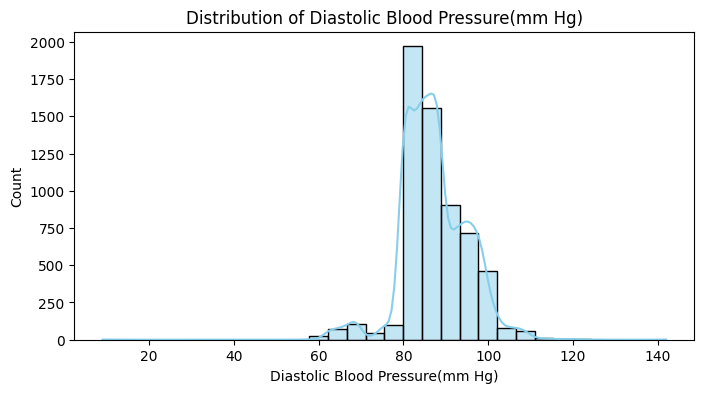

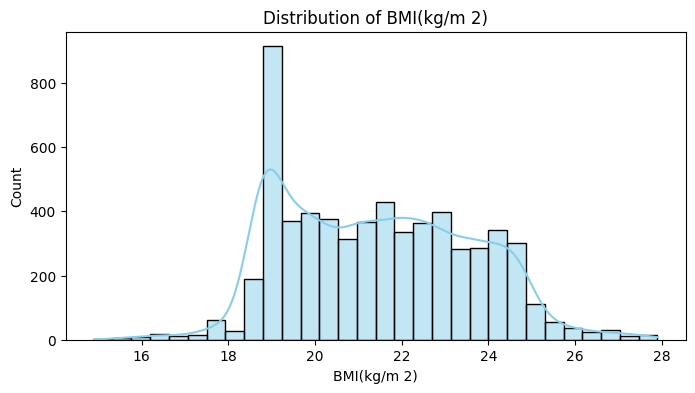

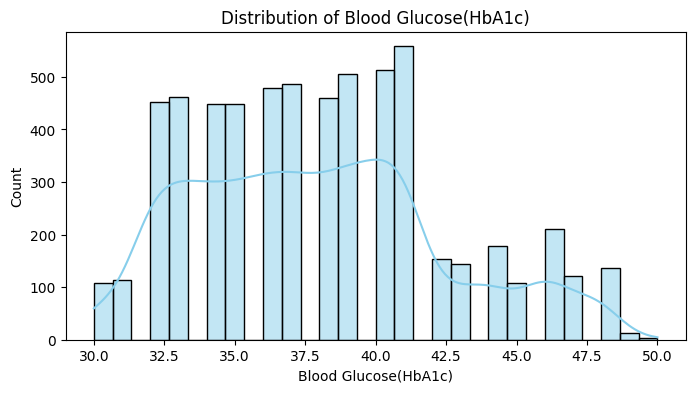

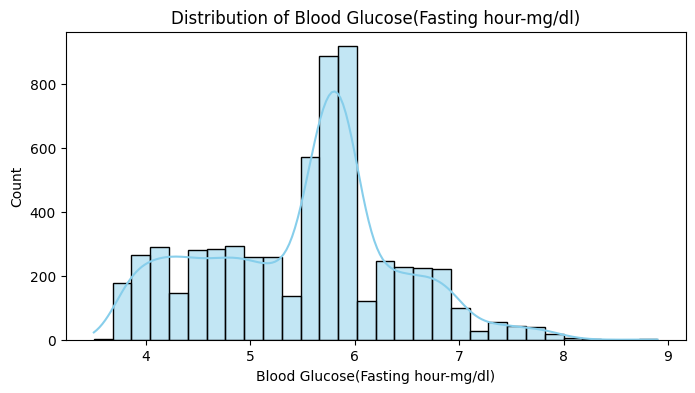

In [61]:
#Visualization of distribution of each feature
for column in numerical_columns:
    # Checking if the column exists in the DataFrame before plotting
    if column in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.show()
    else:
        print(f"Warning: Column '{column}' not found in the DataFrame.")

Multivariate Analysis


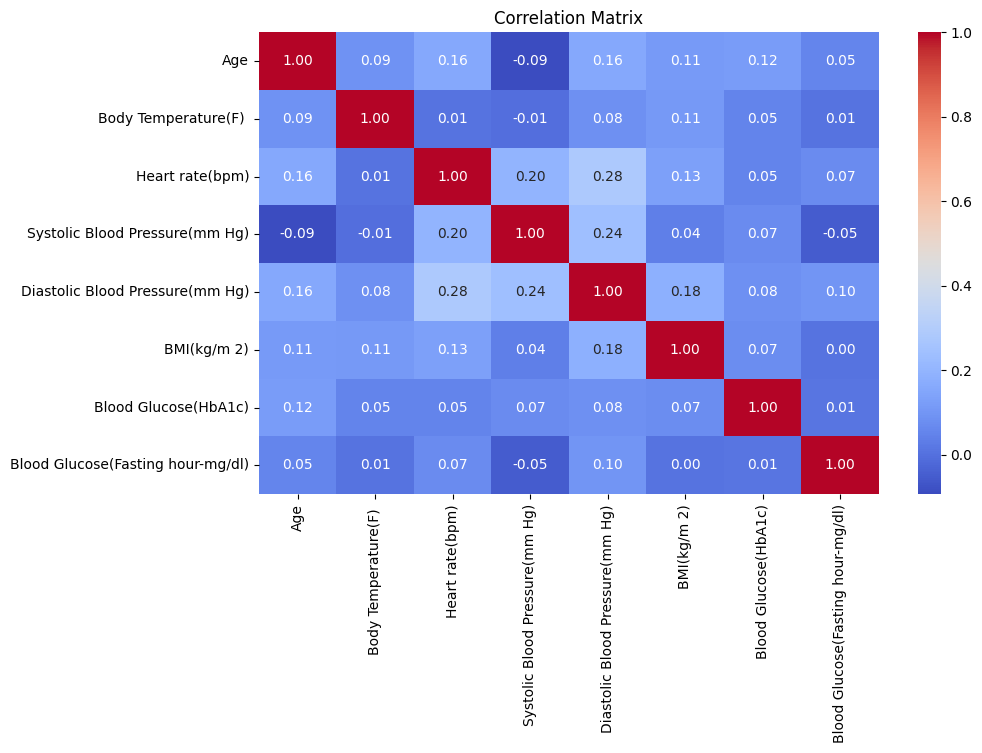

In [62]:
#correlation matrix: visualizations to explore relationships between variables.
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [63]:
#Outlier detection using IQR
numerical_columns=(['Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
       'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
       'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
       'Blood Glucose(Fasting hour-mg/dl)']) # Removed 'Outcome' from the list


def outlier_detection(df,column):

    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1

    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    outlier=df[(df[column]<lower_bound) | (df[column]>upper_bound)]
    return outlier

for column in numerical_columns: # Now iterating only through numerical columns

    outlier=outlier_detection(df,column)
    print("The outlier in {column}")
    print(outlier)
    print(f"Number of outlier in {column}: {outlier.shape[0]}\n")

The outlier in {column}
      Age  Body Temperature(F)   Heart rate(bpm)  \
1      45                  97.7               99   
121    43                  97.9              120   
134   250                  98.6               76   
267    44                  97.6              145   
372    45                 102.1               49   
...   ...                   ...              ...   
5864   44                  98.0              121   
5934   45                  97.7              141   
5957   44                  96.4              144   
6034   43                  99.6              136   
6039   44                 103.1               57   

      Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
1                                 99                               94   
121                              116                               98   
134                              126                               85   
267                              120                       

<ipython-input-64-179887b3605f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name], palette="colorblind")


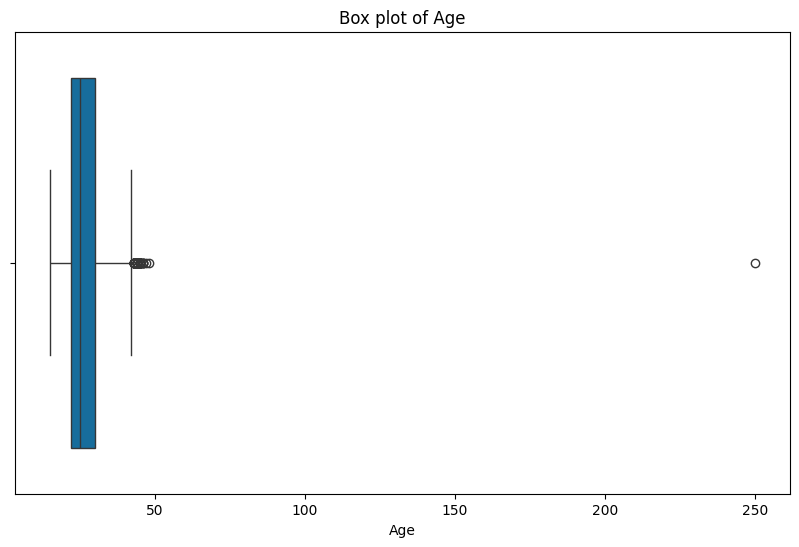

<ipython-input-64-179887b3605f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name], palette="colorblind")


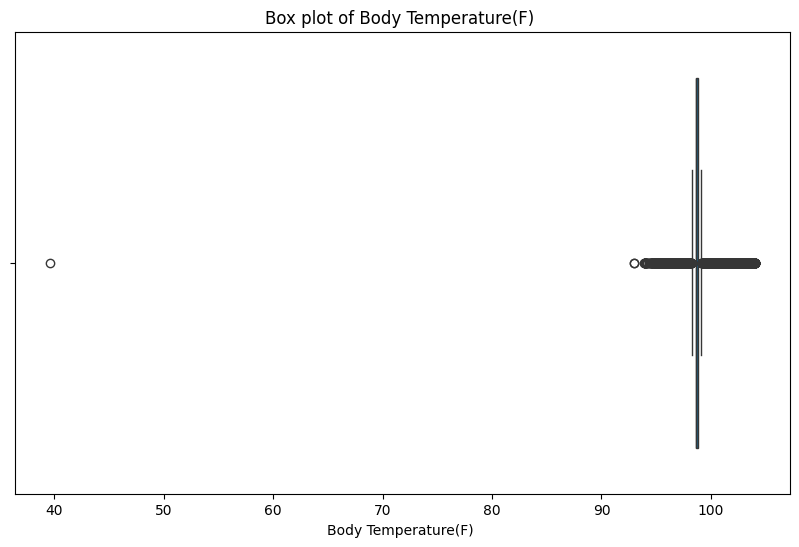

<ipython-input-64-179887b3605f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name], palette="colorblind")


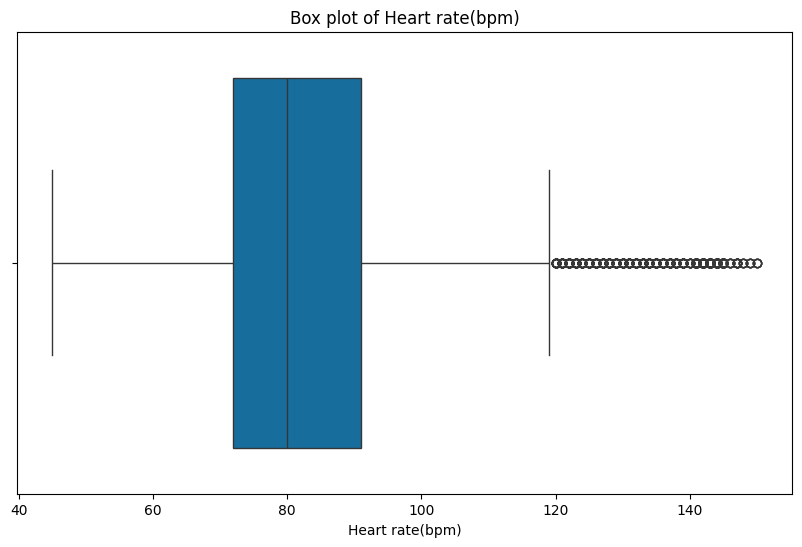

<ipython-input-64-179887b3605f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name], palette="colorblind")


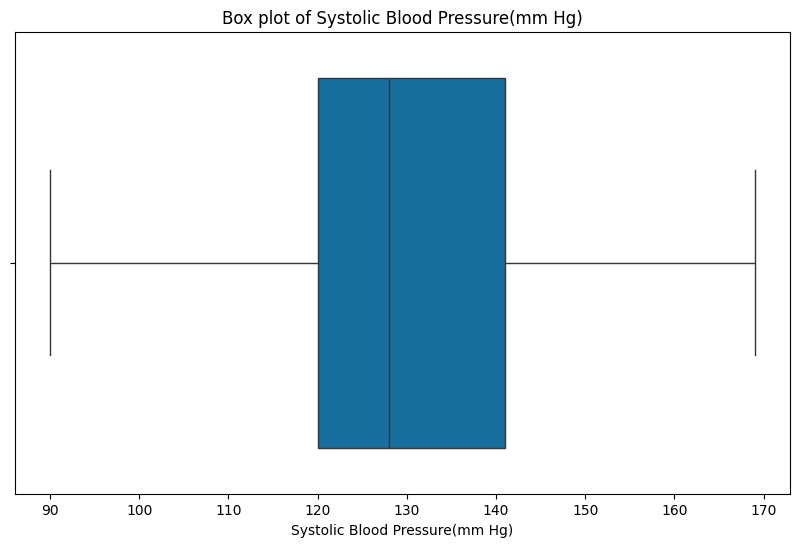

<ipython-input-64-179887b3605f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name], palette="colorblind")


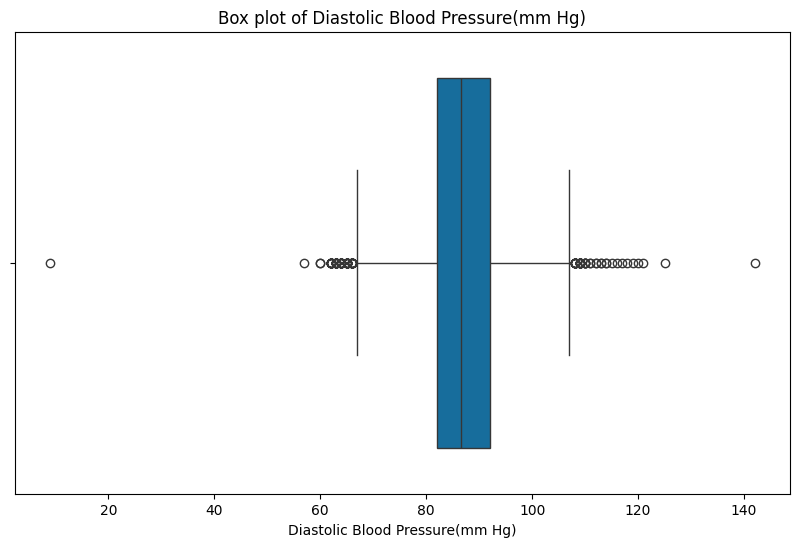

<ipython-input-64-179887b3605f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name], palette="colorblind")


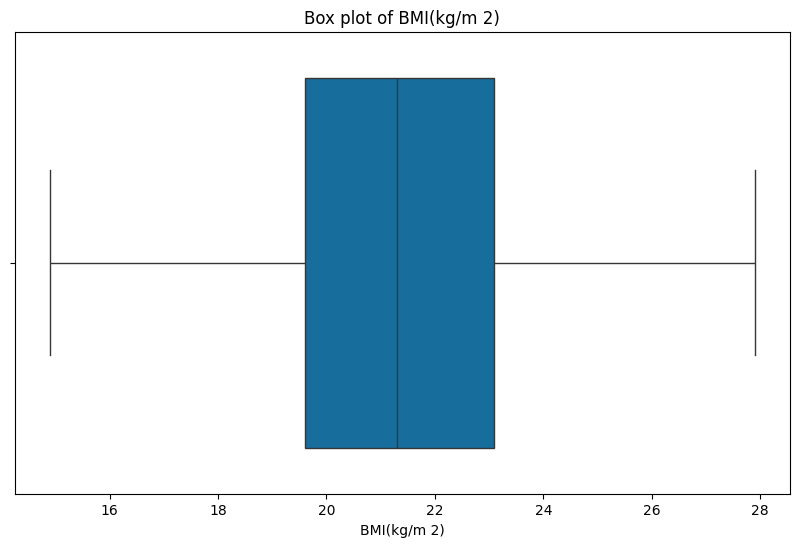

<ipython-input-64-179887b3605f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name], palette="colorblind")


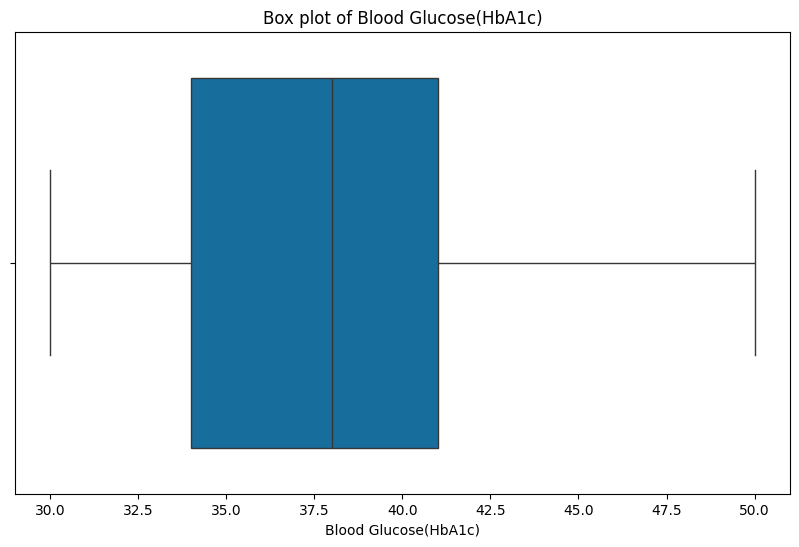

<ipython-input-64-179887b3605f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column_name], palette="colorblind")


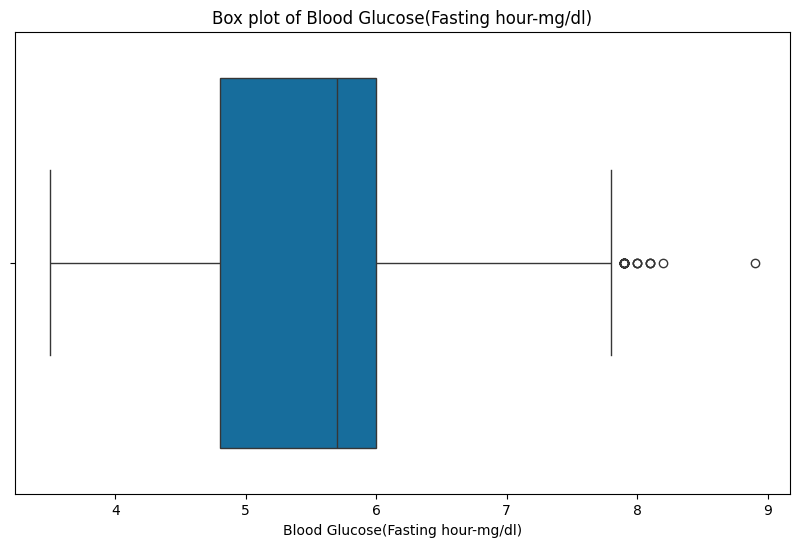

In [64]:
# Visualizing outliers using box plots
for feature in numerical_columns:
    plt.figure(figsize=(10, 6))

    # The 'feature' variable already holds the column name
    column_name = feature

    sns.boxplot(x=df[column_name], palette="colorblind")
    plt.title(f'Box plot of {column_name}')
    plt.show()

In [65]:
age_column = df['Age']

# Calculate the Z-scores for the 'Age' column
z_scores = (age_column - age_column.mean()) / age_column.std()

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers = df[np.abs(z_scores) > 5]

print("Number of outliers:", len(outliers))
print(outliers)

Number of outliers: 1
     Age  Body Temperature(F)   Heart rate(bpm)  \
134  250                  98.6               76   

     Systolic Blood Pressure(mm Hg)  Diastolic Blood Pressure(mm Hg)  \
134                             126                               85   

     BMI(kg/m 2)  Blood Glucose(HbA1c)  Blood Glucose(Fasting hour-mg/dl)  \
134         24.1                    42                                5.9   

      Outcome  
134  low risk  


In [66]:
df=df[df['Age']!=250]

In [67]:
df=df[df['Body Temperature(F) ']!=39.6]

In [70]:
#generating summary statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6100 entries, 0 to 6102
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                6100 non-null   int64   
 1   Body Temperature(F)                6100 non-null   float64 
 2   Heart rate(bpm)                    6100 non-null   int64   
 3   Systolic Blood Pressure(mm Hg)     6100 non-null   int64   
 4   Diastolic Blood Pressure(mm Hg)    6100 non-null   int64   
 5   BMI(kg/m 2)                        6100 non-null   float64 
 6   Blood Glucose(HbA1c)               6100 non-null   int64   
 7   Blood Glucose(Fasting hour-mg/dl)  6100 non-null   float64 
 8   Outcome                            6100 non-null   category
dtypes: category(1), float64(3), int64(5)
memory usage: 435.0 KB


Week 4-6: Model Selection ,Implementation and Optimization


We decided to use different machine learning algorithms to evaluate the performace

1.Logistic Regression

2.K-Nearest Neighbors

3.Random Forest Classifier

4.Support Vector Machine Classifier

5.XGBoost Classifier

In [72]:
# important necessary libraries

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [74]:
X = df[['Age', 'Body Temperature(F) ', 'Heart rate(bpm)',
          'Systolic Blood Pressure(mm Hg)', 'Diastolic Blood Pressure(mm Hg)',
          'BMI(kg/m 2)', 'Blood Glucose(HbA1c)', 'Blood Glucose(Fasting hour-mg/dl)']]
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classifier:
Accuracy Score: 0.5532786885245902

Classification Report:
              precision    recall  f1-score   support

   high risk       0.56      0.45      0.50       411
    low risk       0.57      0.72      0.63       386
    mid risk       0.53      0.51      0.52       423

    accuracy                           0.55      1220
   macro avg       0.55      0.56      0.55      1220
weighted avg       0.55      0.55      0.55      1220


Confusion Matrix:


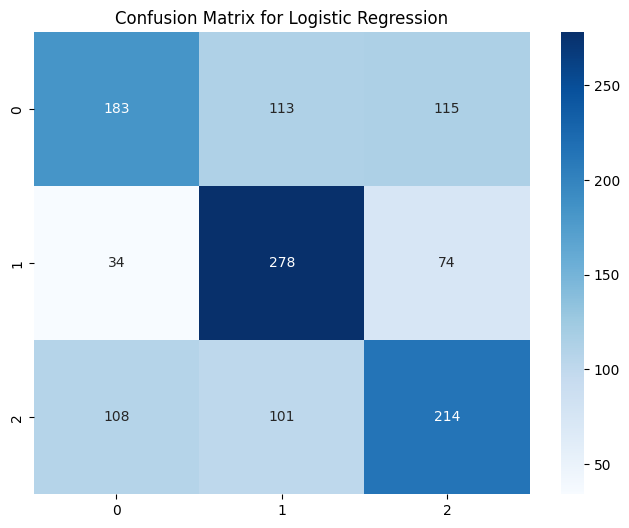

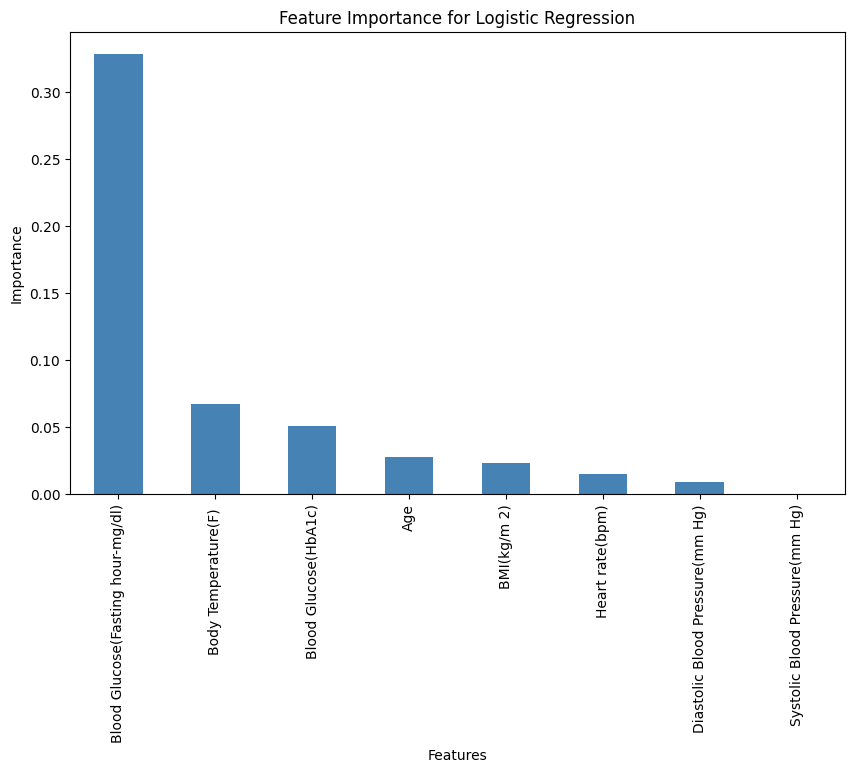

In [75]:
# 1. Logistic Regression

# Create and train the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluation for Logistic Regression
print("Logistic Regression Classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Feature coefficients for Logistic Regression
feature_importances_log_reg = pd.Series(log_reg_model.coef_[0], index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances_log_reg.sort_values(ascending=False).plot(kind='bar', color='steelblue')
plt.title('Feature Importance for Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()




K-Nearest Neighbors Classifier:
Accuracy Score: 0.8704918032786885

Classification Report:
              precision    recall  f1-score   support

   high risk       0.88      0.78      0.83       411
    low risk       0.91      0.99      0.95       386
    mid risk       0.82      0.84      0.83       423

    accuracy                           0.87      1220
   macro avg       0.87      0.87      0.87      1220
weighted avg       0.87      0.87      0.87      1220


Confusion Matrix:


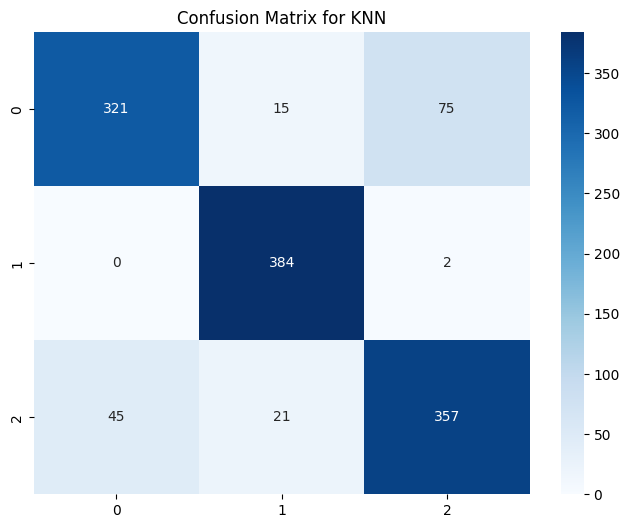

In [76]:
#2.K-Nearest Neighbors (KNN)

# Create and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluation for KNN
print("K-Nearest Neighbors Classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for KNN")
plt.show()

Random Forest Classifier:
Accuracy Score: 0.9901639344262295

Classification Report:
              precision    recall  f1-score   support

   high risk       1.00      0.98      0.99       411
    low risk       0.99      0.99      0.99       386
    mid risk       0.98      0.99      0.99       423

    accuracy                           0.99      1220
   macro avg       0.99      0.99      0.99      1220
weighted avg       0.99      0.99      0.99      1220


Confusion Matrix:


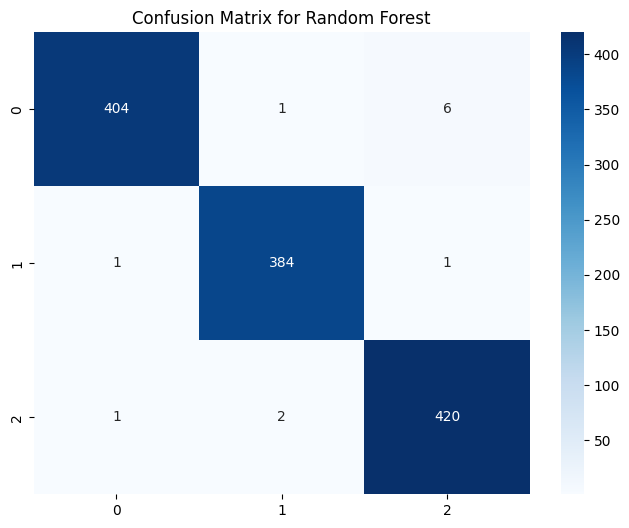

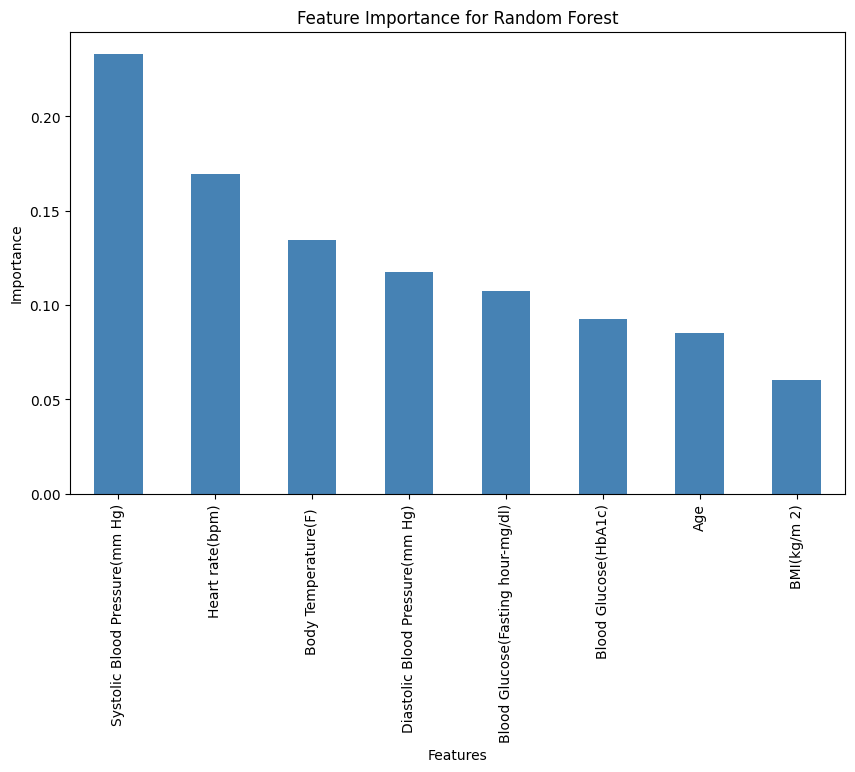

In [77]:
# 3.Random Forest model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation for Random Forest
print("Random Forest Classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Feature importance for Random Forest
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances_rf.sort_values(ascending=False).plot(kind='bar', color='steelblue')
plt.title('Feature Importance for Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

Support Vector Machine Classifier:
Accuracy Score: 0.7729508196721312

Classification Report:
              precision    recall  f1-score   support

   high risk       0.86      0.68      0.76       411
    low risk       0.75      0.99      0.85       386
    mid risk       0.73      0.66      0.70       423

    accuracy                           0.77      1220
   macro avg       0.78      0.78      0.77      1220
weighted avg       0.78      0.77      0.77      1220


Confusion Matrix:


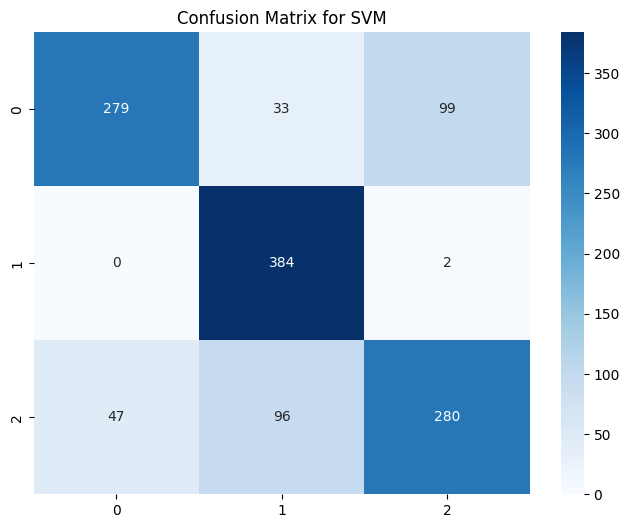

In [78]:
# 4. Support Vector Machine Classifier

# Create and train the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluation for SVM
print("Support Vector Machine Classifier:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix for SVM")
plt.show()

XGBoost Accuracy: 0.99

Classification Report for XGBoost:
              precision    recall  f1-score   support

   high risk       0.99      0.99      0.99       411
    low risk       0.99      0.99      0.99       386
    mid risk       0.98      0.98      0.98       423

    accuracy                           0.99      1220
   macro avg       0.99      0.99      0.99      1220
weighted avg       0.99      0.99      0.99      1220



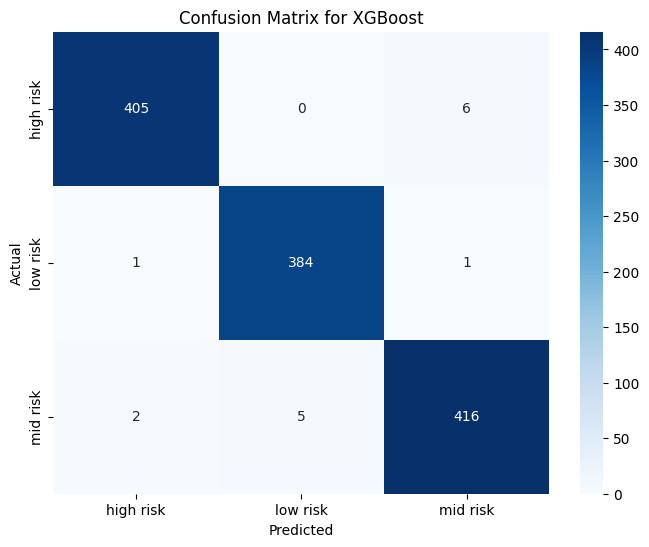

<ipython-input-79-402a7fe9e276>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=X_train.columns, palette='viridis')


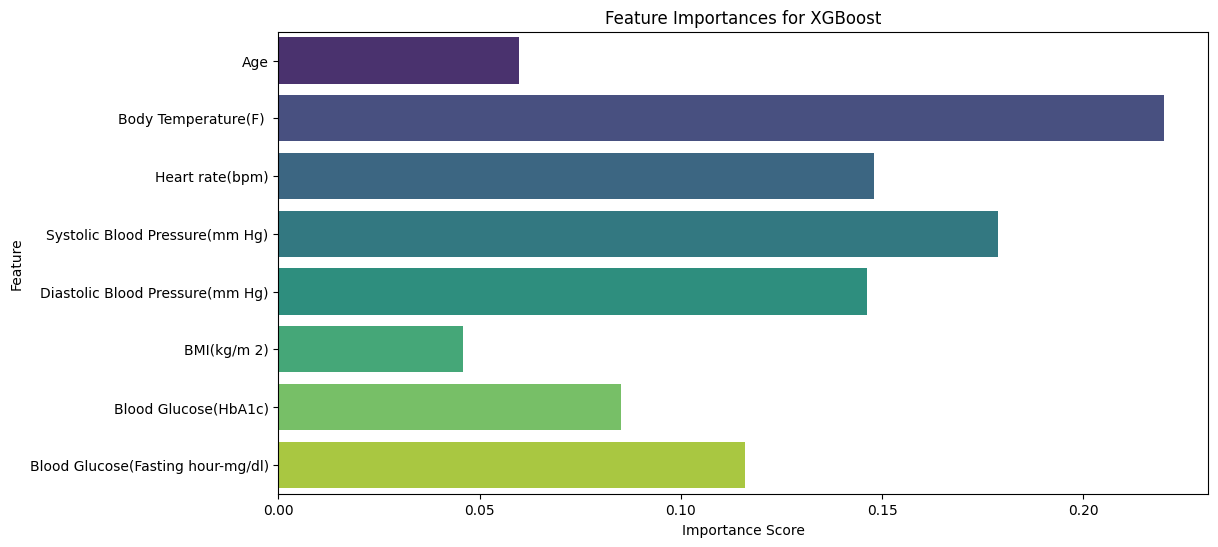

In [79]:
# 5.XGBoost Classifier

from sklearn.preprocessing import LabelEncoder

# Encode the target variable if it's not already numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create and train the XGBoost model
xgb_model = XGBClassifier(eval_metric='mlogloss')  # Removed use_label_encoder as it's deprecated
xgb_model.fit(X_train, y_train_encoded)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation for XGBoost
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print("\nClassification Report for XGBoost:")
print(classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance Plot
feature_importances = xgb_model.feature_importances_
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=X_train.columns, palette='viridis')
plt.title('Feature Importances for XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


Week 7: Model Evaluation and Refinement

In [83]:
# Scale the feature matrix
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Dictionary to store models and their names
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
}

# Dictionary to store results
results = {}

# Train, test, and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train_encoded)

    # Predict on the training and test set
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate training and test accuracy
    train_accuracy = accuracy_score(y_train_encoded, y_train_pred) * 100
    test_accuracy = accuracy_score(y_test_encoded, y_test_pred) * 100
    # Store results
    results[model_name] = {
        'Train Accuracy (%)': f"{train_accuracy:.2f}%",
        'Test Accuracy (%)': f"{test_accuracy:.2f}%"
    }

# Convert results to a DataFrame for comparison
results_df = pd.DataFrame(results).T
print("\nComparison of Training and Testing Scores:")
print(results_df)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:41:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Comparison of Training and Testing Scores:
                    Train Accuracy (%) Test Accuracy (%)
Logistic Regression             56.84%            55.16%
K-Nearest Neighbors             94.59%            91.31%
Random Forest                  100.00%            98.93%
SVM                             95.18%            94.26%
XGBoost                        100.00%            98.77%


Week 8: Model Deployment

Finally,after testing with multiple models, we will use Random forest Classifier model, as it gives a better accuracy

In [86]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepare the feature matrix and target vector using the correct column names
X = df[['Age', 'Body Temperature(F) ', 'Heart rate(bpm)', 'Systolic Blood Pressure(mm Hg)',
          'Diastolic Blood Pressure(mm Hg)', 'BMI(kg/m 2)', 'Blood Glucose(HbA1c)',
          'Blood Glucose(Fasting hour-mg/dl)']]  # Correct feature column names
y = df['Outcome']  # Correct target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the training data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42).fit(X_train_scaled, y_train)

# Mapping for predictions
risk_mapping = {
    0: 'low risk',
    1: 'mid risk',
    2: 'high risk'
}

In [87]:
def predict_outcome():
    while True:
        print("\nProvide the following details (or type 'exit' to stop):")
        try:
            # Collect user input for each feature
            user_input = input("Enter Age (or 'exit' to quit): ").strip()
            if user_input.lower() == "exit":
                print("Exiting the prediction system, Thankyou!")
                break

            user_data = [
                float(user_input),  # Age
                float(input("Enter Body Temperature (F): ")),
                float(input("Enter Heart Rate (bpm): ")),
                float(input("Enter Systolic Blood Pressure (mm Hg): ")),
                float(input("Enter Diastolic Blood Pressure (mm Hg): ")),
                float(input("Enter BMI (kg/m 2): ")),
                float(input("Enter Blood Glucose (HbA1c): ")),
                float(input("Enter Blood Glucose (Fasting hour-mg/dl): "))
            ]

            # Scale the user input
            user_data_scaled = scaler.transform([user_data])

            # Get predictions from the Random Forest model
            rf_pred = rf_model.predict(user_data_scaled)[0]

            # Print the predictions
            print("\nPrediction (Random Forest Model):", risk_mapping[rf_pred])

            # Get prediction probabilities
            user_probs = rf_model.predict_proba(user_data_scaled)
            print("User Prediction Probabilities:", user_probs)

        except ValueError:
            print("Invalid input. Please enter numeric values for the fields.")
        except Exception as e:
            print(f"An error occurred: {e}")

# Run the prediction function
predict_outcome()


Provide the following details (or type 'exit' to stop):
Enter Age (or 'exit' to quit): 20
Enter Body Temperature (F): 96
Enter Heart Rate (bpm): 120
Enter Systolic Blood Pressure (mm Hg): 120
Enter Diastolic Blood Pressure (mm Hg): 80
Enter BMI (kg/m 2): 45
Enter Blood Glucose (HbA1c): 46
Enter Blood Glucose (Fasting hour-mg/dl): 55


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


An error occurred: 'high risk'

Provide the following details (or type 'exit' to stop):
Enter Age (or 'exit' to quit): exit
Exiting the prediction system!
